In [1]:
import hbcvt
import numpy as np
import math
import serial
import time
import queue
import pandas as pd

R = 1.5 / 2
R_TO_R = 2.5
B_TO_B_X = 4.5
B_TO_B_Y = 5
Z_AXIS = 0.6
PAPER_X = 210
PAPER_Y = 297
X_TOL = 10
Y_TOL = 10
B_SIZE = np.array([R_TO_R + B_TO_B_X, 2 * R_TO_R + B_TO_B_Y])
MAX_X_LINE = math.floor((PAPER_X - 2 * X_TOL) / B_SIZE[0])
MAX_Y_LINE = math.floor((PAPER_Y - 2 * Y_TOL) / B_SIZE[1])

br_arr = np.zeros((3 * MAX_Y_LINE, 2 *MAX_X_LINE))

spec_coin = 0
alphabet_coin = 0
st_coin = 0

mac_list1 = ['것', '을', '은', '인']
mac_br1 = [[[0, 0, 0, 1, 1, 1], [0, 1, 1, 1, 0, 0]],
          [[0, 1, 1, 1, 0, 1]],
          [[1, 0, 1, 0, 1, 1]],
          [[1, 1, 1, 1, 1, 0]]]
mac_list2 = ['그래서', '그러나', '그러면', '그러므로', '그런데', '그리고', '그리하여']
mac_br2 = [[[1, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0]],
          [[1, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0]],
          [[1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0]],
          [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1]],
          [[1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0]],
          [[1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1]],
          [[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 1]]]

spec_list = ['(', ')', '-', '~']
spec_br = [[[0, 0, 1, 0, 0, 1]],
           [[0, 0, 1, 0, 0, 1]],
           [[0, 0, 1, 0, 0, 1]],
           [[0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1]]]
st_list = ['ㅃ', 'ㅉ', 'ㄸ', 'ㄲ', 'ㅆ']

def find_specific_str(s, ss):
    i = 0
    return_list1 = []
    while True:
        k = s.find(ss, i)
        if  k != -1:
            return_list1.append(s[i: k])
            return_list1.append(ss)
            i = k + len(ss)
        if s.find(ss, i) == -1:
            return_list1.append(s[i:])
            break
    return_list2 = []
    for i in return_list1:
        if i != '':
            return_list2.append(i)
    return return_list2

def refine_str(input_str):
    vol_result = []
    
    """공백문자 마법사"""
    
    result = find_specific_str(input_str, ' ')
    print(result)
    
    """숫자 마법사"""
    
    for i in range(len(result)):
        number_coin = 0    # 상태 숫자 = 1 , 문자 = 0
        number_state = False
        for j in range(len(result[i])):
            if j == 0:
                number_state = result[i][j].isdigit()
            if number_state != result[i][j].isdigit():
                vol_result.append(result[i][number_coin: j])
                number_state = result[i][j].isdigit()
                number_coin = j
            if j == len(result[i]) - 1:
                vol_result.append(result[i][number_coin: j + 1])
                
    result = vol_result
    vol_result = []
    print(result)
    
    """엔터 마법사"""
    
    for i in range(len(result)):
        vol_list = find_specific_str(result[i], '\n')
        for j in range(len(vol_list)):
            vol_result.append(vol_list[j])
            
    result = vol_result
    vol_result = []
    print(result)
    
    """매크로1 마법사"""
    
    for k1 in range(len(mac_list1)):
        vol_result = []
        for i in range(len(result)):
            vol_list = find_specific_str(result[i], mac_list1[k1])
            for j in range(len(vol_list)):
                vol_result.append(vol_list[j])
        result = vol_result
    
    result = vol_result
    vol_result = []
    print(result)
    
    """매크로2 마법사"""
    
    for k2 in range(len(mac_list2)):
        vol_result = []
        for i in range(len(result)):
            vol_list = find_specific_str(result[i], mac_list2[k2])
            for j in range(len(vol_list)):
                vol_result.append(vol_list[j])
        result = vol_result
    
    result = vol_result
    vol_result = []
    print(result)
    
    """특수문자 마법사"""
    
    for k3 in range(len(spec_list)):
        vol_result = []
        for i in range(len(result)):
            vol_list = find_specific_str(result[i], spec_list[k3])
            for j in range(len(vol_list)):
                vol_result.append(vol_list[j])
        result = vol_result
    
    result = vol_result
    vol_result = []
    
    print(result)
    return result

def interpreter(input_str):
    result = []
    vol_result = []
    
    if input_str == ' ':
        print('공백')
        vol_result.append([0, 0, 0, 0, 0, 0])
    
    elif input_str in mac_list1:
        print('매크로1')
        for i in mac_br1[mac_list1.index(input_str)]:
            vol_result.append(i)
    
    elif input_str in mac_list2:
        print('매크로2')
        for i in mac_br2[mac_list2.index(input_str)]:
            vol_result.append(i)
        
    elif input_str[0].isdigit():
        print('숫자')
        vol_hbcvt = hbcvt.h2b.text(input_str)
        vol_result.append([0, 0, 1, 1, 1, 1])
        for i in range(len(vol_hbcvt)):
            for j in range(len(vol_hbcvt[i][1])):
                vol_result.append(vol_hbcvt[i][1][j][1][1])
            
    elif input_str[0].isalpha():
        print('한글알파벳')
        vol_hbcvt = hbcvt.h2b.text(input_str)
        for i in range(len(vol_hbcvt)):
            for j in range(len(vol_hbcvt[i][1])):
                for k in range(len(vol_hbcvt[i][1][j][1])):
                    vol_result.append(vol_hbcvt[i][1][j][1][k])
                    
    elif input_str in spec_list:
        print('특수문자')
        for i in spec_br[spec_list.index(input_str)]:
            vol_result.append(i)
    
    elif input_str[0] == '\n':
        print('엔터')
        vol_result.append(['#1'])
    
    else:
        print('뭔지 모르겠음')
        vol_hbcvt = hbcvt.h2b.text(input_str)
        for i in range(len(vol_hbcvt)):
            for j in range(len(vol_hbcvt[i][1])):
                for k in range(len(vol_hbcvt[i][1][j][1])):
                    vol_result.append(vol_hbcvt[i][1][j][1][k])
    
    result = vol_result
    vol_result = []
    print(len(result))
    
    return result

def interpreter_to_a4(br_result, input_set, cursor):
    vol_br_paper = br_result
    vol_cursor = cursor
    max_y, max_x = vol_br_paper.shape
    for i in range(len(input_set)):
        for j in range(len(input_set[i])):
            if input_set[i][j][0] == '#1':
                print('엔터')
                vol_cursor = [0, vol_cursor[1] + 3]
            else:
                print('글자')
                if vol_cursor[0] == max_x:
                    print('줄바꿈')
                    vol_cursor = [0, vol_cursor[1] + 3]
                else:
                    print('글쓰기')
                    vol_br_paper[vol_cursor[1]][vol_cursor[0]] = input_set[i][j][0]
                    vol_cursor = [vol_cursor[0], vol_cursor[1] + 1]
                    vol_br_paper[vol_cursor[1]][vol_cursor[0]] = input_set[i][j][1]
                    vol_cursor = [vol_cursor[0], vol_cursor[1] + 1]
                    vol_br_paper[vol_cursor[1]][vol_cursor[0]] = input_set[i][j][2]
                    vol_cursor = [vol_cursor[0] + 1, vol_cursor[1] - 2]
                    vol_br_paper[vol_cursor[1]][vol_cursor[0]] = input_set[i][j][3]
                    vol_cursor = [vol_cursor[0], vol_cursor[1] + 1]
                    vol_br_paper[vol_cursor[1]][vol_cursor[0]] = input_set[i][j][4]
                    vol_cursor = [vol_cursor[0], vol_cursor[1] + 1]
                    vol_br_paper[vol_cursor[1]][vol_cursor[0]] = input_set[i][j][5]
                    vol_cursor = [vol_cursor[0] + 1, vol_cursor[1] - 2]
            print(vol_cursor)
    return cursor, br_result

def a4_to_block(br_result):
    return_list = np.zeros((MAX_Y_LINE, MAX_X_LINE))
    for i in range(MAX_Y_LINE):
        for j in range(MAX_X_LINE):
            if not br_result[3 * i: 3 * i + 3, 2 * j: 2 * j + 2].any():
                return_list[i][j] = 0
            else:
                return_list[i][j] = 1
    return return_list

def return_two_end_points(input_list):
    st_point = 0
    end_point = len(input_list)
    st_token = 0
    end_token = 0
    for i in range(end_point):
        if input_list[i] != 0 and st_token == 0:
            st_point = i
            st_token = 1
        if input_list[len(input_list) - 1 - i] != 0 and end_token == 0:
            end_point = len(input_list) - 1 - i
            end_token = 1
    if st_token == 0 and end_token == 0:
        return -1, -1
    else:
        return st_point, end_point

def find_edge(input_list):
    return_list = []
    for i in range(len(input_list)):
        vol_list = []
        st_point, end_point = return_two_end_points(input_list[i])
        if st_point != -1 and end_point != - 1:
            vol_list.append(i)
            vol_list.append(st_point)
            vol_list.append(end_point)
            return_list.append(vol_list)
    return_list = np.array(return_list)
    return return_list

In [2]:
vvvvv = """퇴화차수"""



In [3]:
arrrr = refine_str(vvvvv)

['퇴화차수']
['퇴화차수']
['퇴화차수']
['퇴화차수']
['퇴화차수']
['퇴화차수']


In [4]:
result_set = []
for i in range(len(arrrr)):
    try:
        vol_interpreter = interpreter(arrrr[i])
        print(vol_interpreter)
        _ = vol_interpreter[0][0]
        result_set.append(vol_interpreter)
    except:
        _ = 0

한글알파벳
8
[[1, 1, 0, 0, 1, 0], [1, 0, 1, 1, 1, 1], [0, 1, 0, 1, 1, 0], [1, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1], [1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0]]


In [5]:
_, a4 = interpreter_to_a4(br_arr, result_set, [0, 0])

글자
글쓰기
[2, 0]
글자
글쓰기
[4, 0]
글자
글쓰기
[6, 0]
글자
글쓰기
[8, 0]
글자
글쓰기
[10, 0]
글자
글쓰기
[12, 0]
글자
글쓰기
[14, 0]
글자
글쓰기
[16, 0]


In [6]:
pd.DataFrame(a4).to_csv('a4.csv', index=False)

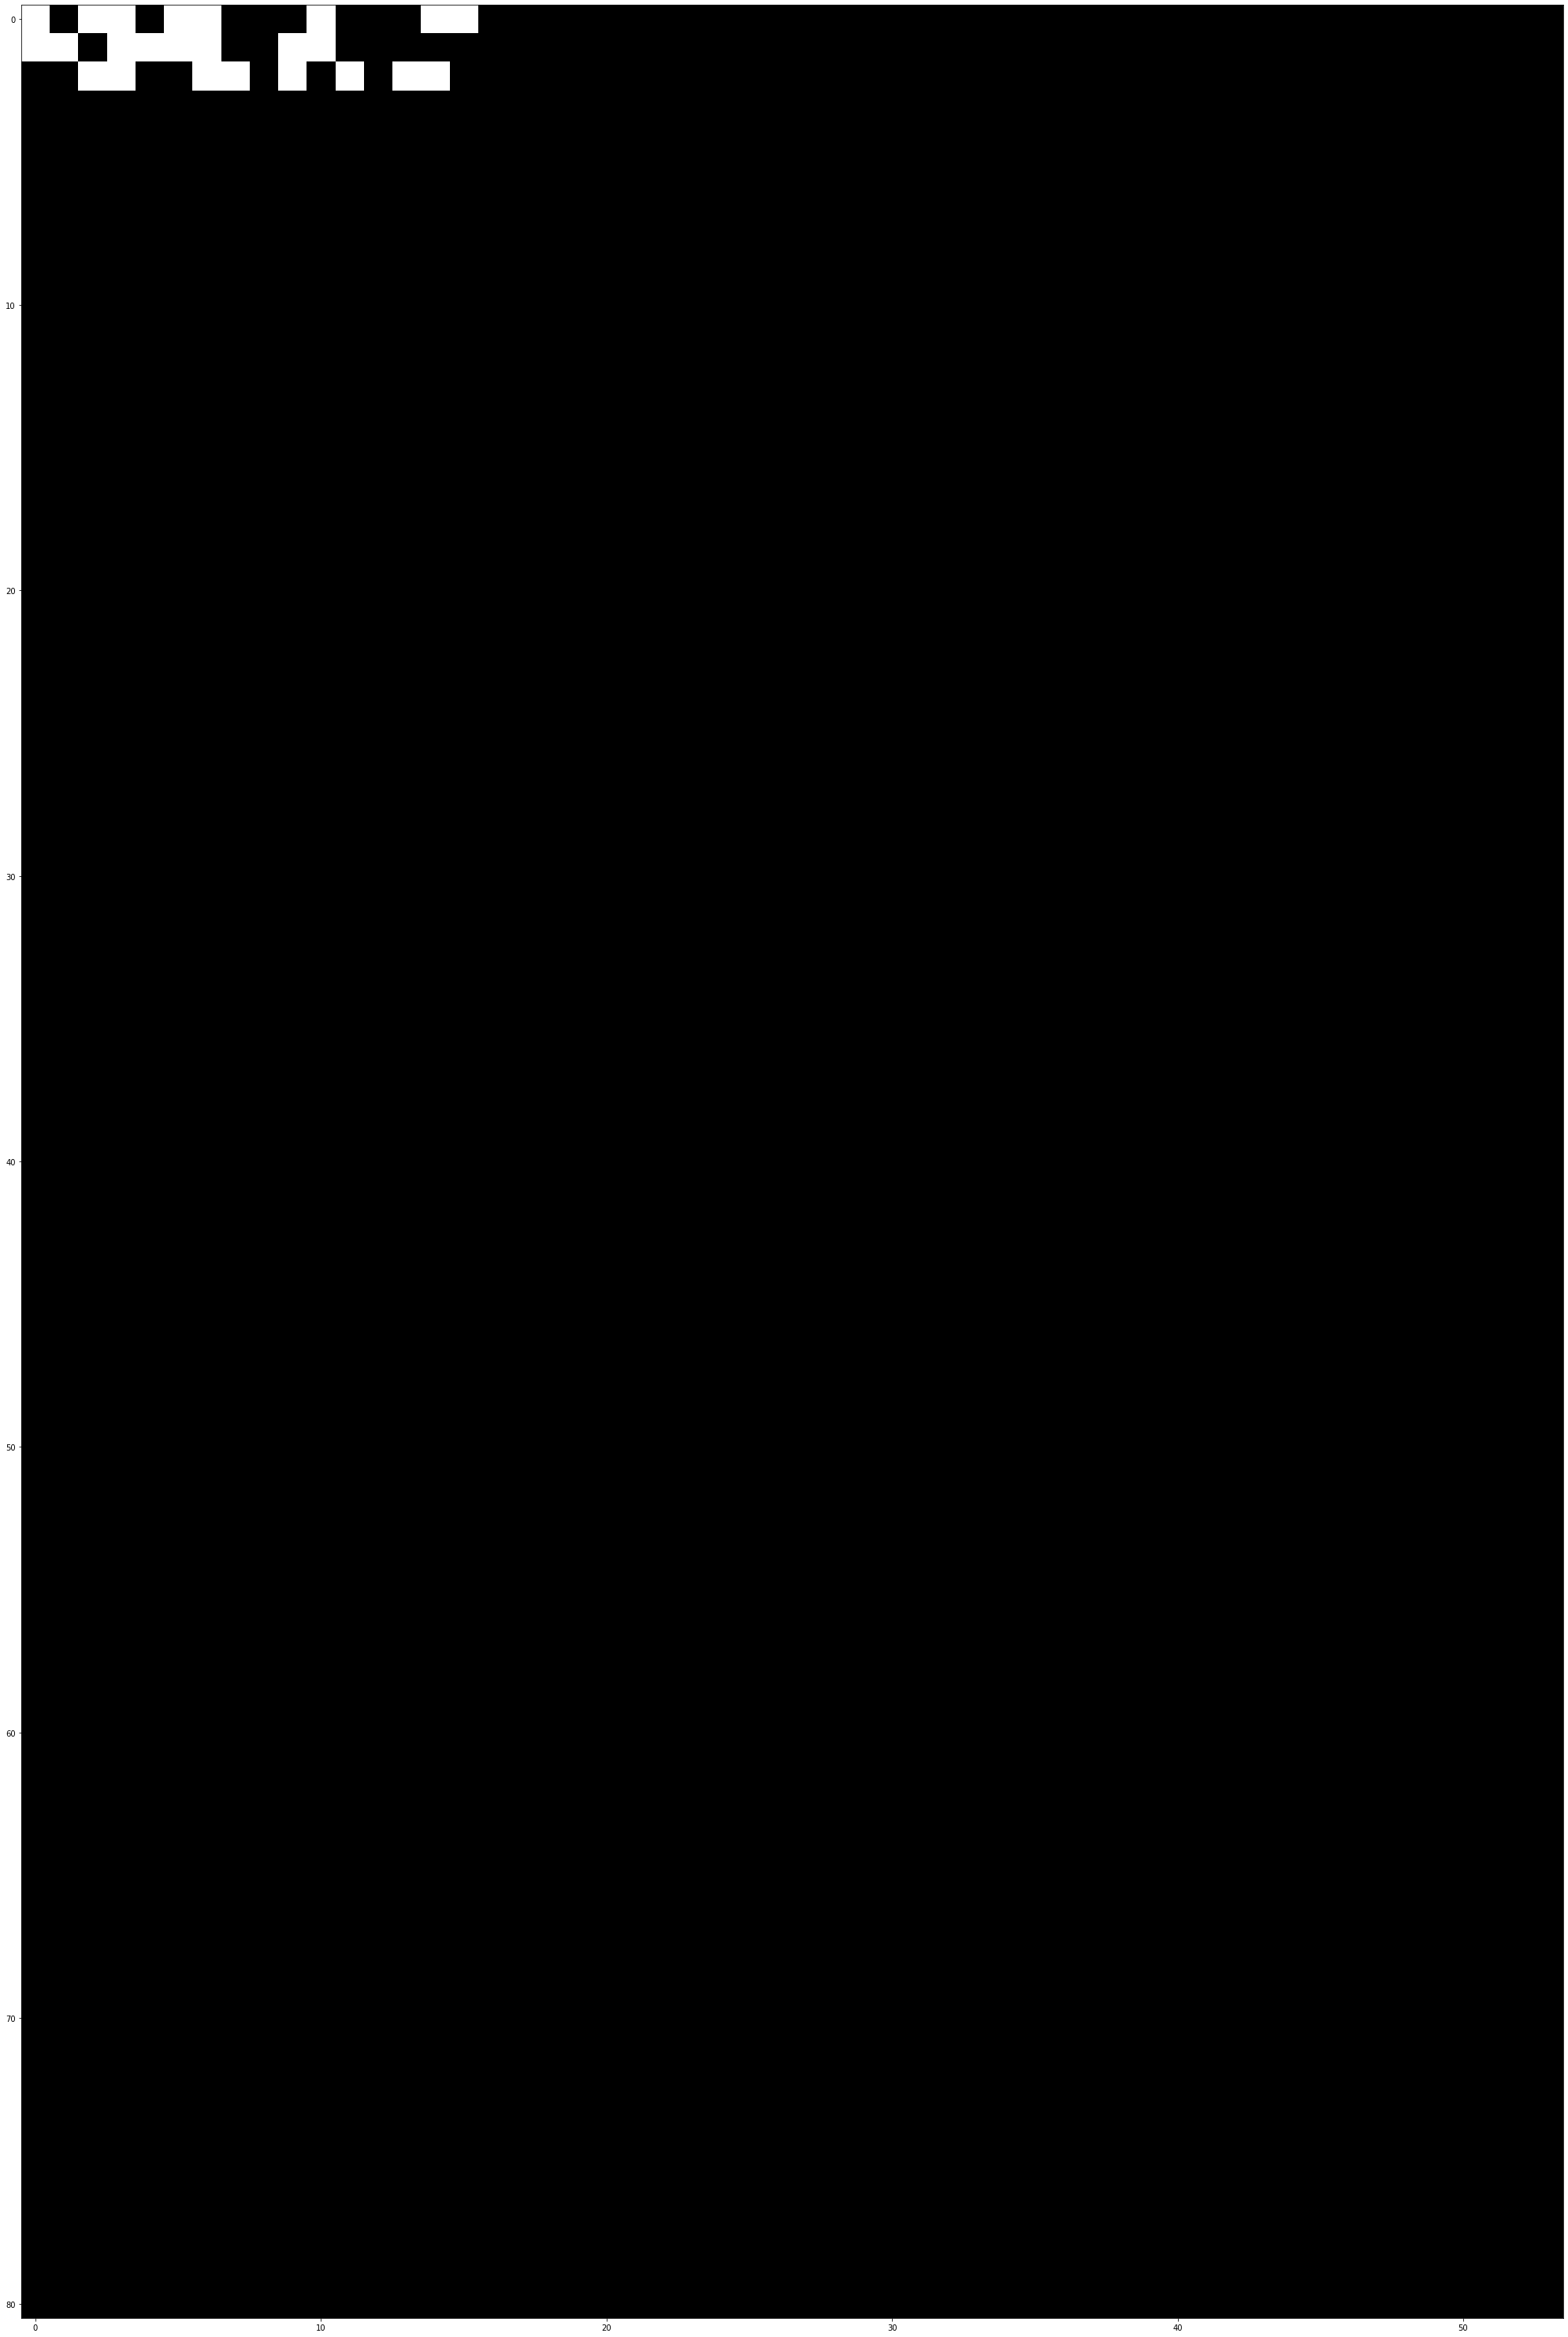

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=br_arr.shape)
plt.imshow(a4, cmap='gray')

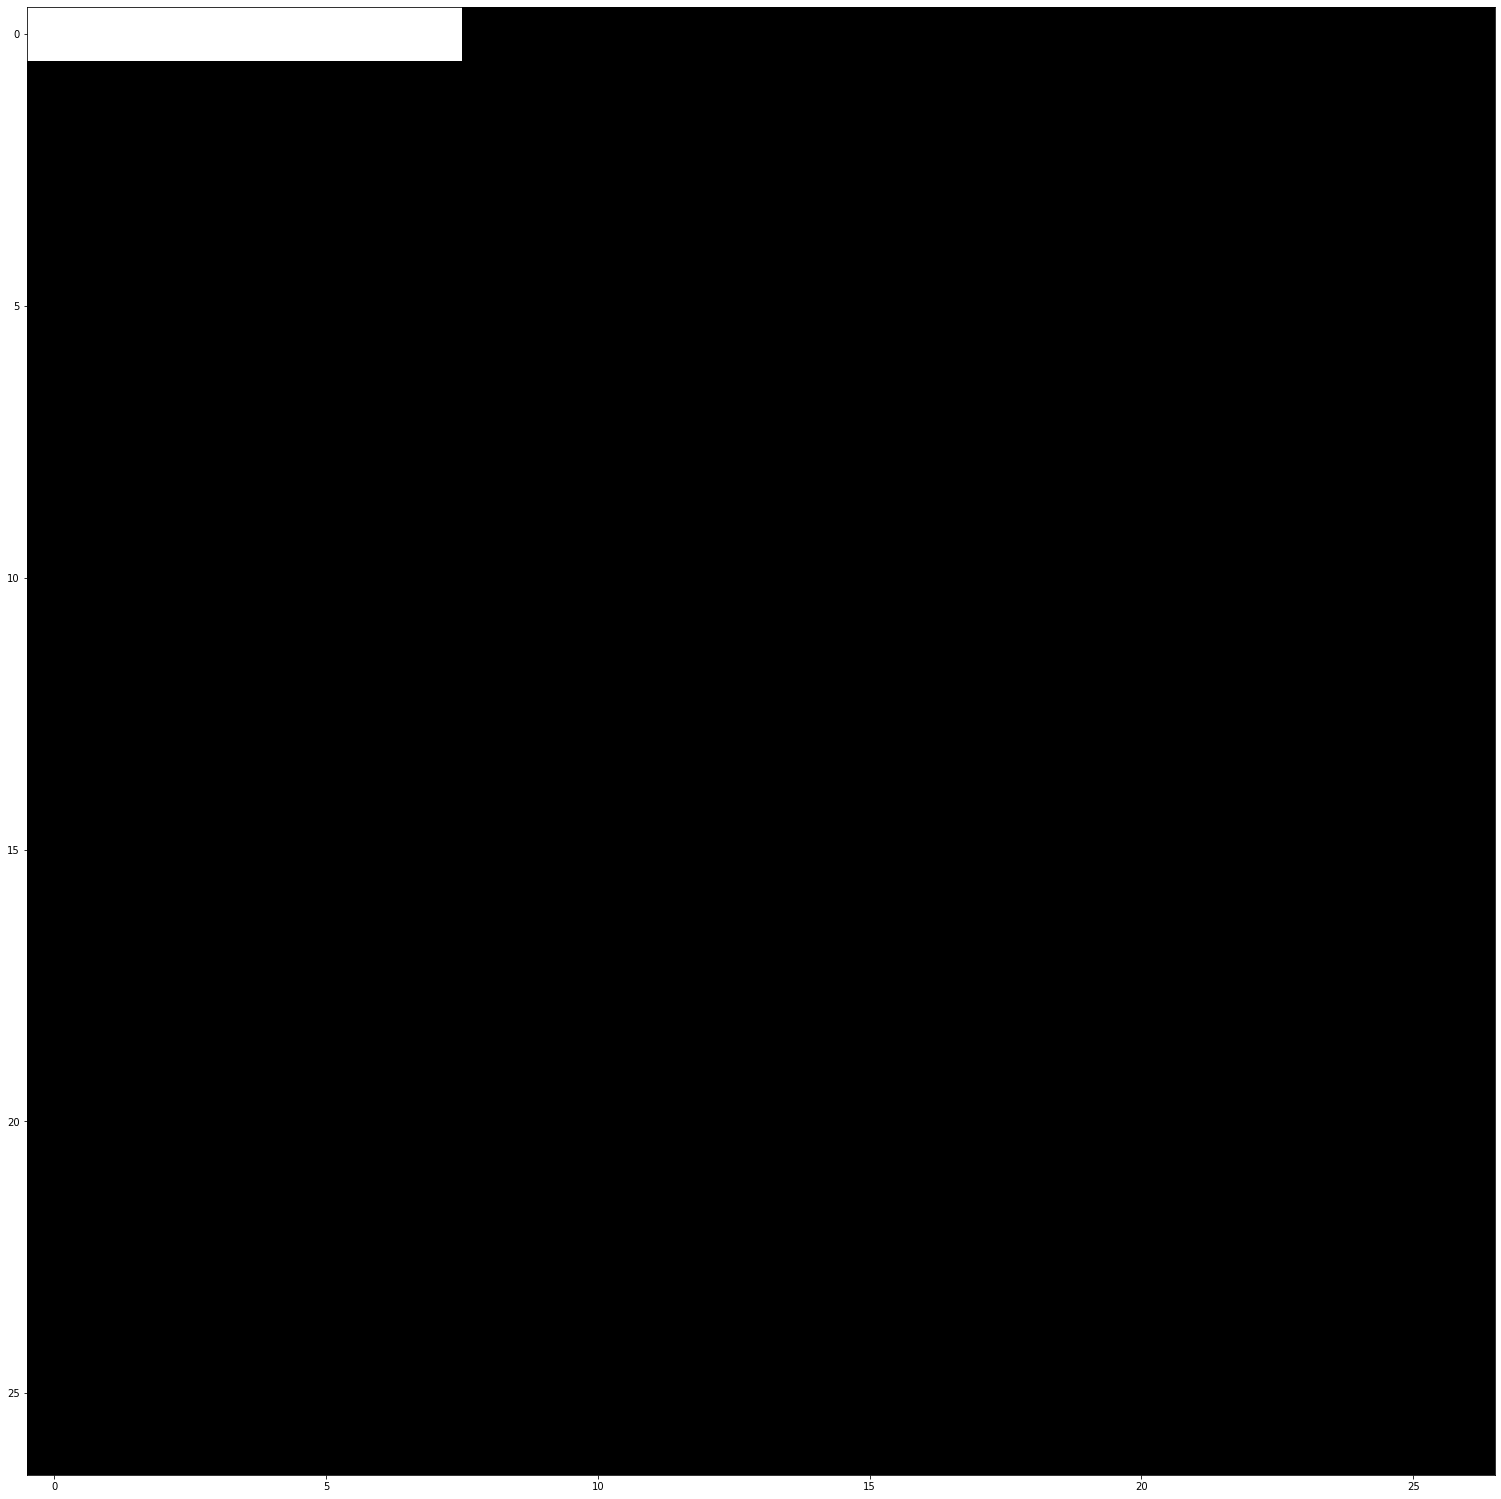

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=[MAX_X_LINE, MAX_Y_LINE])
plt.imshow(a4_to_block(a4), cmap='gray')

In [9]:
"""
def a4_to_serial(input_a4, cursor=np.array([0, 0])):
    return_serial = []
    block = a4_to_block(input_a4)
    vol_cursor = np.array(cursor)

    for i in range(len(input_a4)):
        for j in range(len(input_a4[0])):
            if input_a4[i][j] != 0:
                return_serial.append('p')
            vol_cursor[0] += 1
            if vol_cursor[0] % 2 == 0:
                return_serial.append('R')
            else:
                return_serial.append('r')
            if vol_cursor[0] == len(input_a4[0]):
                while vol_cursor[0] != 0:
                    vol_cursor -= 1
                    if vol_cursor[0] % 2 == 0:
                        return_serial.append('l')
                    else:
                        return_serial.append('L')
                vol_cursor[1] += 1
    return return_serial
"""

def direction_mov(init_block, next_block):
    init_block = np.array(init_block)
    next_block = np.array(next_block)
    if init_block[0] + 1 == next_block[0] and init_block[0] % 2 == 0:
        return 'r'
    elif init_block[0] + 1 == next_block[0] and init_block[0] % 2 == 1:
        return 'R'
    elif init_block[0] - 1 == next_block[0] and init_block[0] % 2 == 0:
        return 'L'
    elif init_block[0] - 1 == next_block[0] and init_block[0] % 2 == 1:
        return 'l'
    elif init_block[1] + 1 == next_block[1] and init_block[1] % 3 == 0:
        return 'd'
    elif init_block[1] + 1 == next_block[1] and init_block[1] % 3 == 1:
        return 'd'
    elif init_block[1] + 1 == next_block[1] and init_block[1] % 3 == 2:
        return 'D'
    

In [10]:
print(direction_mov([0, 2], [0, 3]))
print(direction_mov([0, 2], [1, 2]))
print(direction_mov([1, 2], [2, 2]))
print(direction_mov([2, 2], [1, 2]))
print(direction_mov([3, 2], [2, 2]))

D
r
R
L
l


In [11]:
find_edge(a4)

array([[ 0,  0, 15],
       [ 1,  0, 10],
       [ 2,  2, 14]])

In [12]:
def a4_to_serial(input_a4, cursor=np.array([0, 0])):
    return_serial = []
    vol_cursor = np.array(cursor)
    edge = find_edge(input_a4)
    print(edge)
    print(vol_cursor[1])
    y_num = 0
    state_token1 = 0

    """try start"""
    """initialize state"""
    if vol_cursor[1] == edge[y_num][0] and vol_cursor[0] == edge[y_num][1]:
        state_token1 = 1
    elif vol_cursor[1] == edge[y_num][0] and vol_cursor[0] == edge[y_num][2]:
        state_token1 = -1
    elif vol_cursor[1] == edge[y_num][0]:
        state_token1 = 3
    else:
        state_token1 = 4
    """initialize end"""

    while y_num < len(edge):

        if vol_cursor[1] == edge[y_num][0] and vol_cursor[0] == edge[y_num][1] and state_token1 == 0:
            state_token1 = 1

        elif vol_cursor[1] == edge[y_num][0] and vol_cursor[0] == edge[y_num][2] and state_token1 == 0:
            state_token1 = -1

        if state_token1 == 1:
            if input_a4[vol_cursor[1]][vol_cursor[0]] == 1:
                return_serial.append('p')
                print('p')
            if vol_cursor[0] < edge[y_num][2]:
                init_loc = vol_cursor
                new_loc = [vol_cursor[0] + 1, vol_cursor[1]]
                return_serial.append(direction_mov(vol_cursor, new_loc))
                print(direction_mov(vol_cursor, new_loc))
                vol_cursor = new_loc
            elif vol_cursor[0] == edge[y_num][2]:
                state_token1 = 4

        elif state_token1 == -1:
            if input_a4[vol_cursor[1]][vol_cursor[0]] == 1:
                return_serial.append('p')
                print('p')
            if vol_cursor[0] > edge[y_num][1]:
                init_loc = vol_cursor
                new_loc = [vol_cursor[0] - 1, vol_cursor[1]]
                return_serial.append(direction_mov(vol_cursor, new_loc))
                print(direction_mov(vol_cursor, new_loc))
                vol_cursor = new_loc
            elif vol_cursor[0] == edge[y_num][1]:
                state_token1 = 4

        elif state_token1 == 2:
            if vol_cursor[1] != edge[y_num][0]:
                init_loc = vol_cursor
                new_loc = [vol_cursor[0], vol_cursor[1] + 1]
                return_serial.append(direction_mov(vol_cursor, new_loc))
                print(direction_mov(vol_cursor, new_loc))
                vol_cursor = new_loc
            else:
                state_token1 = 3

        elif state_token1 == 3:
            if vol_cursor[0] - edge[y_num][1] < edge[y_num][2] - vol_cursor[0]:
                while vol_cursor[0] != edge[y_num][1]:
                    if vol_cursor[0] > edge[y_num][1]:
                        init_loc = vol_cursor
                        new_loc = [vol_cursor[0] - 1, vol_cursor[1]]
                        return_serial.append(direction_mov(vol_cursor, new_loc))
                        print(direction_mov(vol_cursor, new_loc))
                        vol_cursor = new_loc
                    else:
                        init_loc = vol_cursor
                        new_loc = [vol_cursor[0] + 1, vol_cursor[1]]
                        return_serial.append(direction_mov(vol_cursor, new_loc))
                        print(direction_mov(vol_cursor, new_loc))
                        vol_cursor = new_loc
                    print(vol_cursor)
            else:
                while vol_cursor[0] != edge[y_num][2]:
                    if vol_cursor[0] < edge[y_num][2]:
                        init_loc = vol_cursor
                        new_loc = [vol_cursor[0] + 1, vol_cursor[1]]
                        return_serial.append(direction_mov(vol_cursor, new_loc))
                        print(direction_mov(vol_cursor, new_loc))
                        vol_cursor = new_loc
                    else:
                        init_loc = vol_cursor
                        new_loc = [vol_cursor[0] - 1, vol_cursor[1]]
                        return_serial.append(direction_mov(vol_cursor, new_loc))
                        print(direction_mov(vol_cursor, new_loc))
                        vol_cursor = new_loc
                    print(vol_cursor)
            if vol_cursor[0] == edge[y_num][1] or vol_cursor[0] == edge[y_num][2]:
                state_token1 = 0

        elif state_token1 == 4:
            y_num += 1
            state_token1 = 2

        else:
            print('0')
            break
    """try end"""
    
    """except start"""
    """except end"""
    return return_serial

In [13]:
serial = a4_to_serial(a4, [53, 0])

[[ 0  0 15]
 [ 1  0 10]
 [ 2  2 14]]
0
l
[52, 0]
L
[51, 0]
l
[50, 0]
L
[49, 0]
l
[48, 0]
L
[47, 0]
l
[46, 0]
L
[45, 0]
l
[44, 0]
L
[43, 0]
l
[42, 0]
L
[41, 0]
l
[40, 0]
L
[39, 0]
l
[38, 0]
L
[37, 0]
l
[36, 0]
L
[35, 0]
l
[34, 0]
L
[33, 0]
l
[32, 0]
L
[31, 0]
l
[30, 0]
L
[29, 0]
l
[28, 0]
L
[27, 0]
l
[26, 0]
L
[25, 0]
l
[24, 0]
L
[23, 0]
l
[22, 0]
L
[21, 0]
l
[20, 0]
L
[19, 0]
l
[18, 0]
L
[17, 0]
l
[16, 0]
L
[15, 0]
p
l
p
L
l
L
l
p
L
l
L
l
p
L
p
l
L
p
l
p
L
l
p
d
p
r
p
R
r
p
R
p
r
p
R
p
r
R
r
p
R
p
d
r
[11, 2]
R
[12, 2]
r
[13, 2]
R
[14, 2]
p
L
p
l
L
p
l
L
p
l
L
p
l
p
L
l
L
p
l
p


In [14]:
import turtle
import time

l = 3

"""
0: right
1: left
2: up
3: down
"""
def draw(roman, direction):
    turtle.color('black')
    if roman == 'r':
        if direction == 0:
            turtle.forward(2.5 * l)
        elif direction == 1:
            turtle.right(180)
            turtle.forward(2.5 * l)
        elif direction == 2:
            turtle.right(90)
            turtle.forward(2.5 * l)
        elif direction == 3:
            turtle.left(90)
            turtle.forward(2.5 * l)
        return 0

    elif roman == 'R':
        if direction == 0:
            turtle.forward(4.5 * l)
        elif direction == 1:
            turtle.right(180)
            turtle.forward(4.5 * l)
        elif direction == 2:
            turtle.right(90)
            turtle.forward(4.5 * l)
        elif direction == 3:
            turtle.left(90)
            turtle.forward(4.5 * l)
        return 0

    elif roman == 'l':
        if direction == 0:
            turtle.right(180)
            turtle.forward(2.5 * l)
        elif direction == 1:
            turtle.forward(2.5 * l)
        elif direction == 2:
            turtle.left(90)
            turtle.forward(2.5 * l)
        elif direction == 3:
            turtle.right(90)
            turtle.forward(2.5 * l)
        return 1

    elif roman == 'L':
        if direction == 0:
            turtle.right(180)
            turtle.forward(4.5 * l)
        elif direction == 1:
            turtle.forward(4.5 * l)
        elif direction == 2:
            turtle.left(90)
            turtle.forward(4.5 * l)
        elif direction == 3:
            turtle.right(90)
            turtle.forward(4.5 * l)
        return 1

    elif roman == 'd':
        if direction == 0:
            turtle.right(90)
            turtle.forward(2.5 * l)
        elif direction == 1:
            turtle.left(90)
            turtle.forward(2.5 * l)
        elif direction == 2:
            turtle.right(180)
            turtle.forward(2.5 * l)
        elif direction == 3:
            turtle.forward(2.5 * l)
        return 3

    elif roman == 'D':
        if direction == 0:
            turtle.right(90)
            turtle.forward(5 * l)
        elif direction == 1:
            turtle.left(90)
            turtle.forward(5 * l)
        elif direction == 2:
            turtle.right(180)
            turtle.forward(5 * l)
        elif direction == 3:
            turtle.forward(5 * l)
        return 3
    
    elif roman == 'p':
        turtle.dot(1.5 * l, 'red')
        return -1
    
turtle.speed(10)
turtle.pensize(0.5)
direction = 0
turtle.penup()
turtle.goto(200, 50)
turtle.pendown()
for i in range(len(serial)):
    k = draw(serial[i], direction)
    if k != -1:
        direction = k
turtle.done()